# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the dataset

In [2]:
df=pd.read_csv('Dataset/BlackFriday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Finding the null values

In [3]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

This is seen that Product_Category_2,and Product_Category_3 has very large null values and do not much effect the dataset

In [4]:
df=df.drop(['Product_Category_3','Product_Category_2'],axis=1)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [5]:
for column in df.columns:
    print(column,' : ',df[column].nunique())

User_ID  :  5891
Product_ID  :  3623
Gender  :  2
Age  :  7
Occupation  :  21
City_Category  :  3
Stay_In_Current_City_Years  :  5
Marital_Status  :  2
Product_Category_1  :  18
Purchase  :  17959


In [6]:
for column in df.columns:
    print(column,' : ',df[column].unique())

User_ID  :  [1000001 1000002 1000003 ... 1004113 1005391 1001529]
Product_ID  :  ['P00069042' 'P00248942' 'P00087842' ... 'P00038842' 'P00295642'
 'P00091742']
Gender  :  ['F' 'M']
Age  :  ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation  :  [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category  :  ['A' 'C' 'B']
Stay_In_Current_City_Years  :  ['2' '4+' '3' '1' '0']
Marital_Status  :  [0 1]
Product_Category_1  :  [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]
Purchase  :  [ 8370 15200  1422 ... 14539 11120 18426]


#### How many Male and Female Purchase(Univariate)

In [7]:
df['Gender'].value_counts()

Gender
M    405380
F    132197
Name: count, dtype: int64

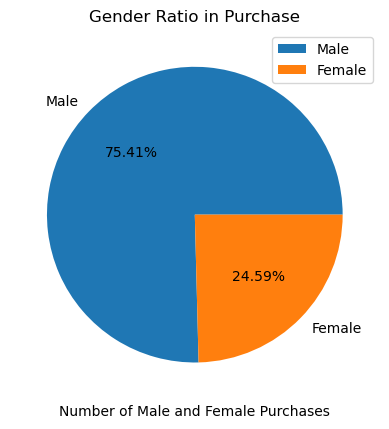

In [8]:
plt.pie(df['Gender'].value_counts(),labels=["Male",'Female'],autopct='%.2f%%')
plt.title('Gender Ratio in Purchase')
plt.xlabel('Number of Male and Female Purchases')

plt.legend()
plt.show()

#### NUmber of male and female customers 

In [9]:
df_customer=df[['User_ID','Gender']].drop_duplicates(keep='first').reset_index().rename(columns={'index':'Prev_Index'})
df_customer.groupby('Gender').size()

Gender
F    1666
M    4225
dtype: int64

(array([0, 1]), [Text(0, 0, 'F'), Text(1, 0, 'M')])

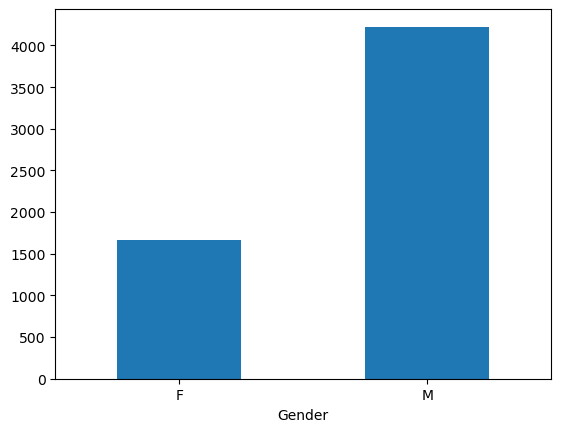

In [10]:
df_customer.groupby('Gender').size().plot(kind='bar')
plt.xticks(rotation=0)

#### Fraction of money spend by male and female(Bivariate)

In [11]:
purchase=df.groupby('Gender')['Purchase'].sum()
purchase

Gender
F    1164624021
M    3853044357
Name: Purchase, dtype: int64

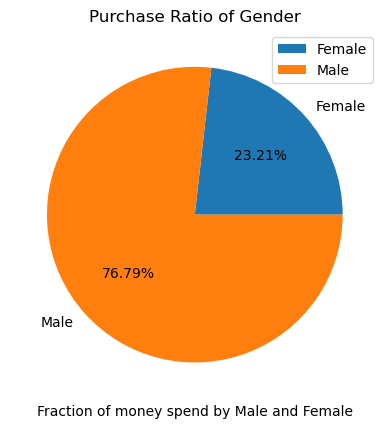

In [12]:
plt.pie(purchase,labels=["Female",'Male'],autopct='%.2f%%')
plt.title('Purchase Ratio of Gender')
plt.xlabel('Fraction of money spend by Male and Female')
plt.legend()
plt.show()

From above pie chart we saw that female has spend more money than males

#### Purchasing Power

array([8809.76134859, 9504.77171296])

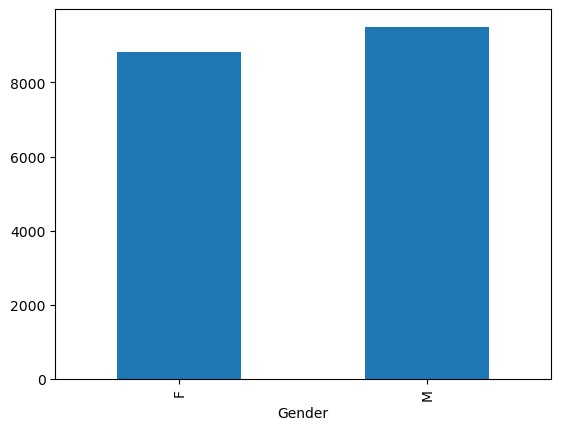

In [13]:
purchasing_power=purchase/df.groupby('Gender').size()
df.groupby('Gender')['Purchase'].mean().plot(kind='bar')
purchasing_power.values

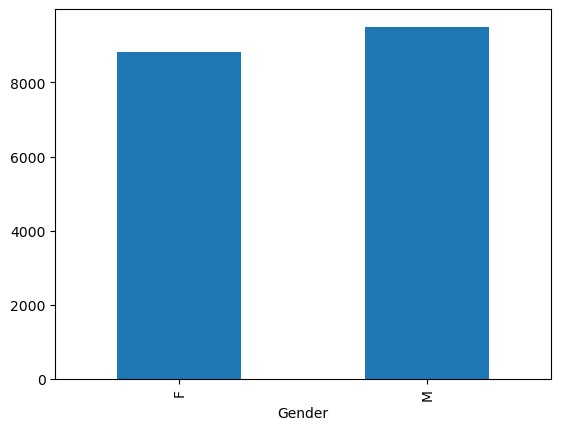

In [14]:
purchasing_power.plot(kind='bar')

plt.show()

### Find NUmber of purchases in each age group

In [15]:
for group in df['Age'].unique():
    print(group," : ",len(df[df['Age']==group]))

0-17  :  14707
55+  :  20903
26-35  :  214690
46-50  :  44526
51-55  :  37618
36-45  :  107499
18-25  :  97634


<Axes: xlabel='Age'>

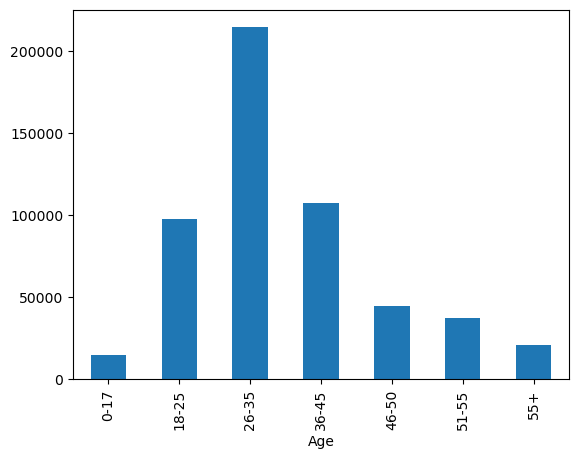

In [16]:
df.groupby('Age').size().plot(kind='bar')

#### Find the number of unique product purchased by each age group

naive approach

In [17]:
lst=[]
for group in df['Age'].unique():
    lst.append([group,df[df['Age']==group]['Product_ID'].nunique()])

agegroup=pd.DataFrame(lst,columns=['Age_group','nUnique Product'])
agegroup=agegroup.sort_values(by='Age_group')

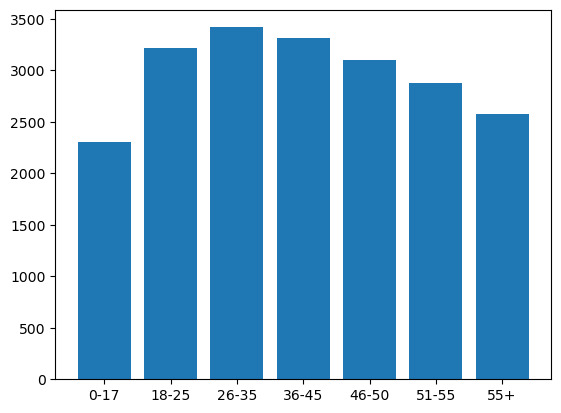

In [18]:
plt.bar(x=agegroup['Age_group'],height=np.array(agegroup['nUnique Product']))
plt.show()

using groupby function

<Axes: ylabel='Product_ID'>

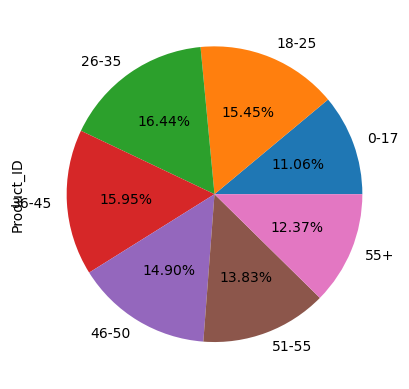

In [19]:
df.groupby('Age')['Product_ID'].nunique().plot(kind='pie',autopct='%.2f%%')

#### FInd which age group has spend most money

<Axes: xlabel='Age'>

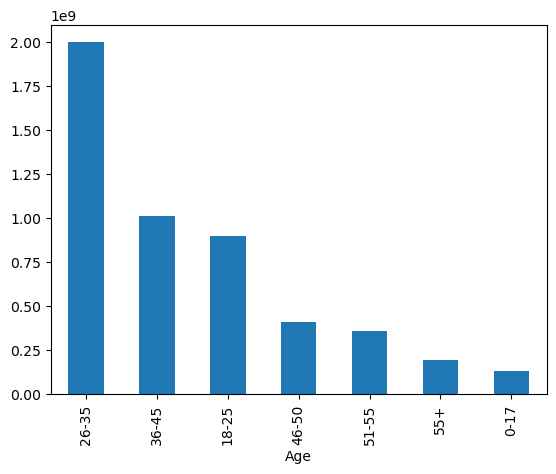

In [20]:
df.groupby('Age')['Purchase'].sum().sort_values(ascending=False).plot(kind='bar')

<Axes: ylabel='Purchase'>

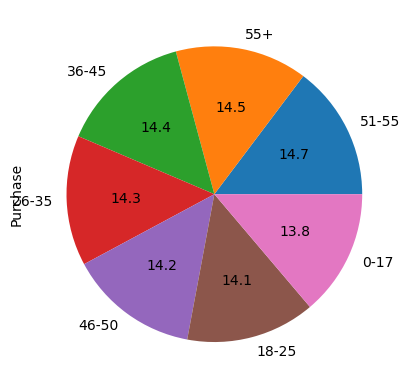

In [21]:
df.groupby('Age')['Purchase'].mean().sort_values(ascending=False).plot(kind='pie',autopct='%.1f')

<Axes: >

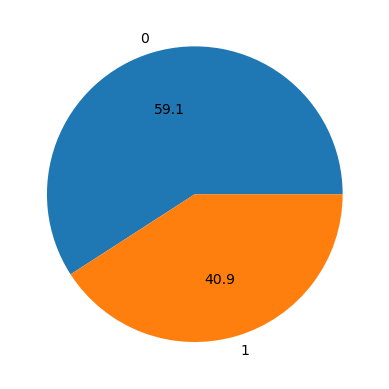

In [22]:
df.groupby('Marital_Status').size().plot(kind='pie',autopct='%.1f')

In [23]:
martial=[]
for gender in df['Gender'].unique():
    for j in range(2):
        martial.append([gender,j,df[(df['Marital_Status']==j)&(df['Gender']==gender)& (df['Age']=='18-25')]['User_ID'].nunique()])
martial

un_df=pd.DataFrame(martial,columns=['Gender','Martial_Status','Number of People'])
un_df

,Gender,Martial_Status,Number of People
0,F,0,217
1,F,1,70
2,M,0,608
3,M,1,174


<Axes: xlabel='Gender', ylabel='Number of People'>

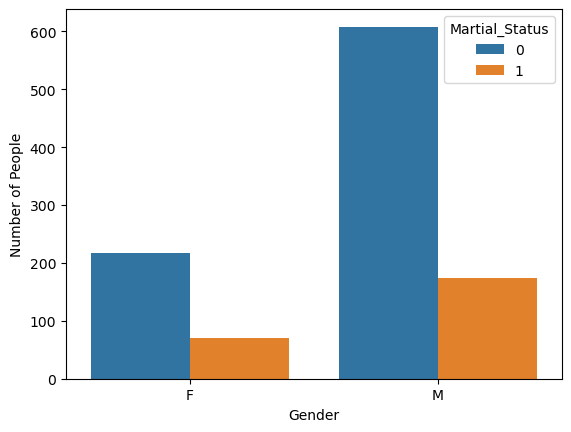

In [24]:
sns.barplot(data=un_df,x='Gender',y='Number of People',hue='Martial_Status')

### How many male and female in each age group

<Axes: xlabel='Age', ylabel='count'>

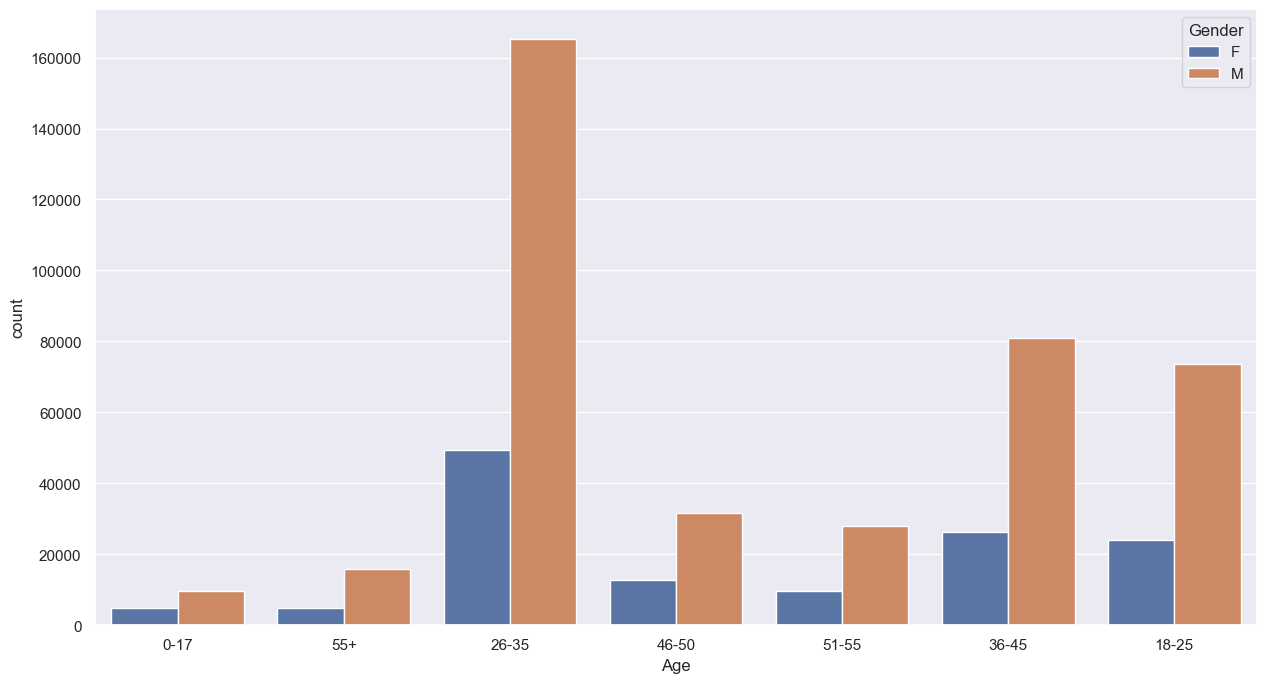

In [25]:
sns.set_theme(rc={'figure.figsize':(15,8)})
sns.countplot(data=df,x='Age',hue='Gender')

<Axes: xlabel='Age', ylabel='count'>

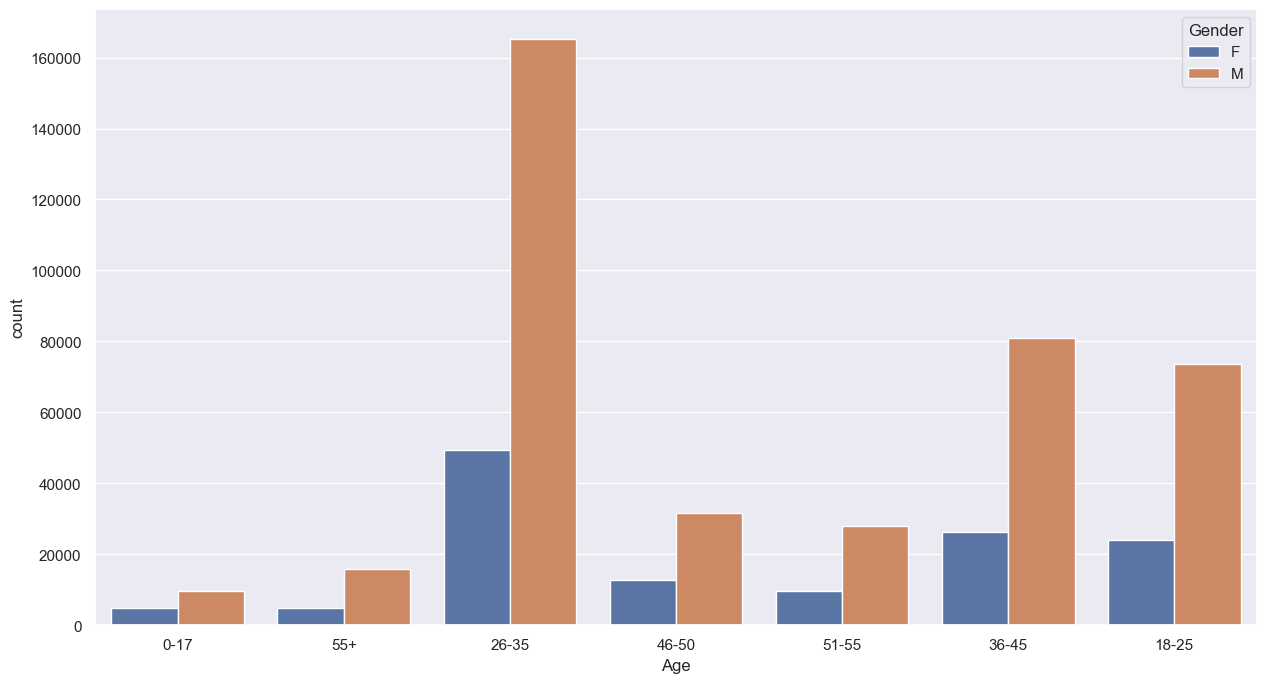

In [26]:
sns.set_theme(rc={'figure.figsize':(15,8)})
sns.countplot(data=df,x='Age',hue='Gender')

In [27]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


### From which city we have the most customers

<Axes: xlabel='City_Category', ylabel='count'>

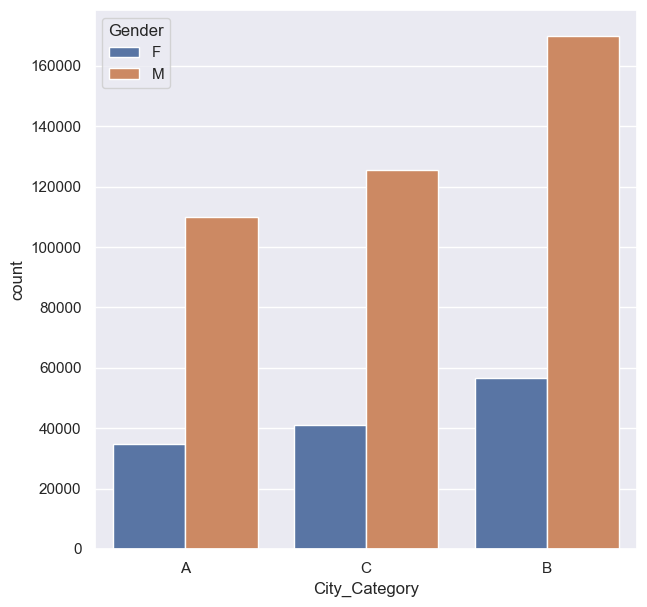

In [28]:
sns.set_theme(rc={'figure.figsize':(7,7)})
sns.countplot(data=df,x='City_Category',hue='Gender')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

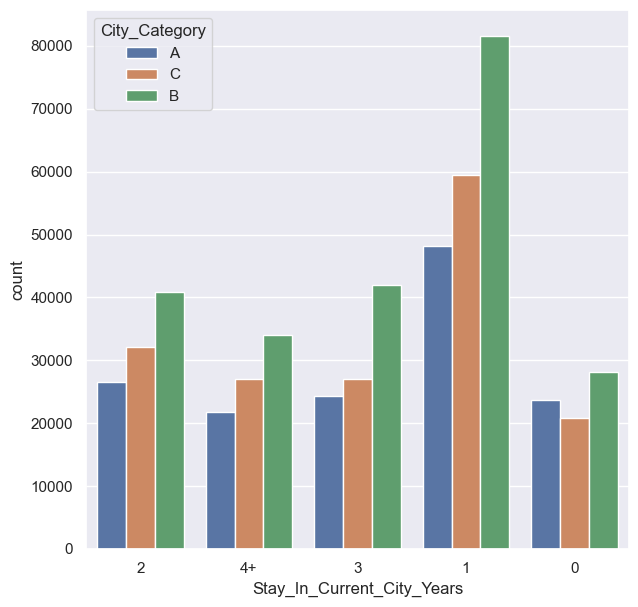

In [29]:
sns.countplot(data=df,x='Stay_In_Current_City_Years',hue='City_Category')

<Axes: xlabel='City_Category', ylabel='Purchase'>

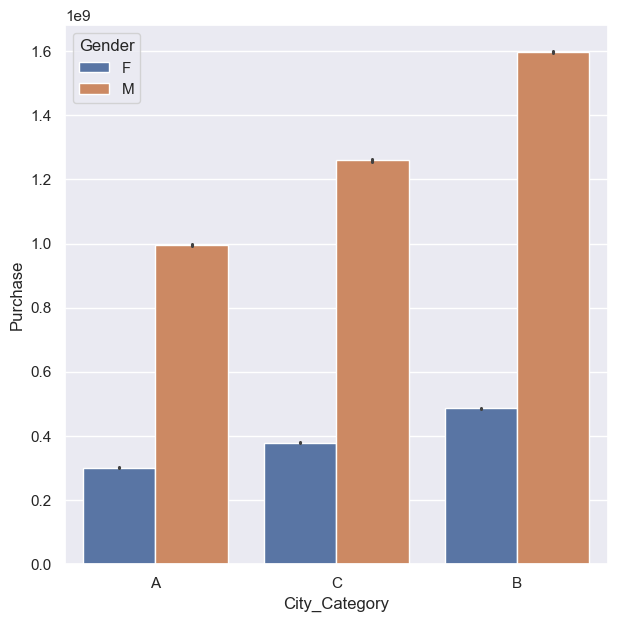

In [30]:
sns.barplot(data=df,x='City_Category',y='Purchase',hue='Gender',estimator='sum')

<Axes: xlabel='City_Category', ylabel='Purchase'>

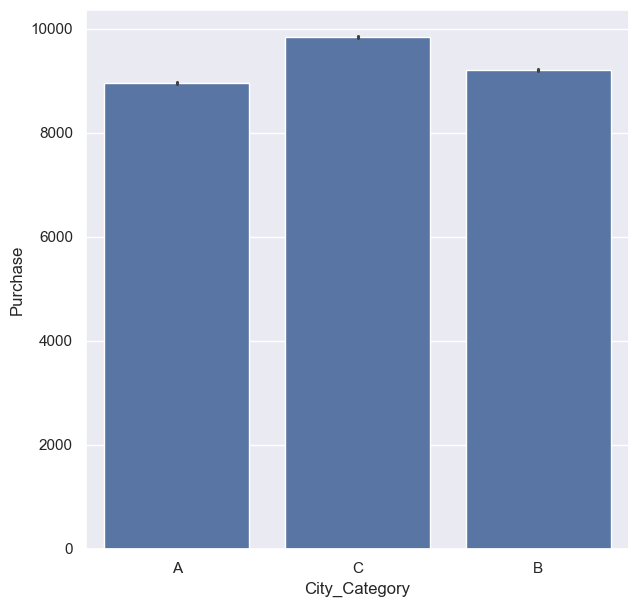

In [31]:
sns.barplot(data=df,x='City_Category',y='Purchase')

### From which city you have the maximum customer

<Axes: ylabel='User_ID'>

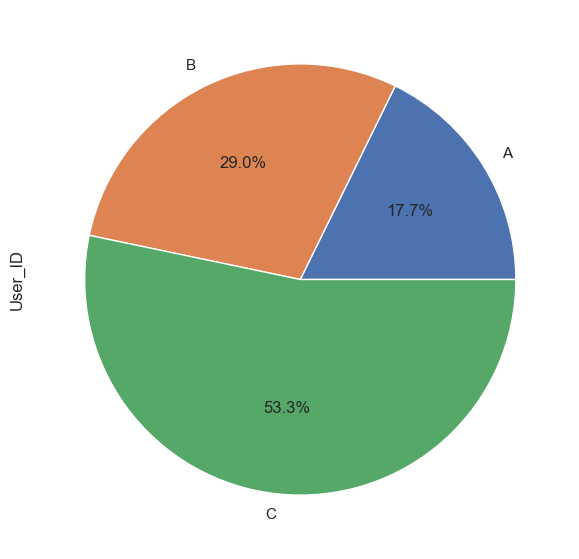

In [32]:
df.groupby('City_Category')['User_ID'].nunique().plot(kind='pie',autopct='%.1f%%')

#### Find which city people buy more costly things

<Axes: >

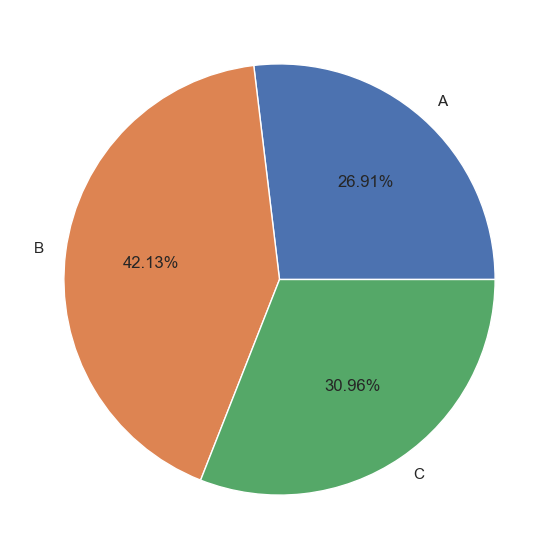

In [33]:
df.groupby('City_Category').size().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='Purchase'>

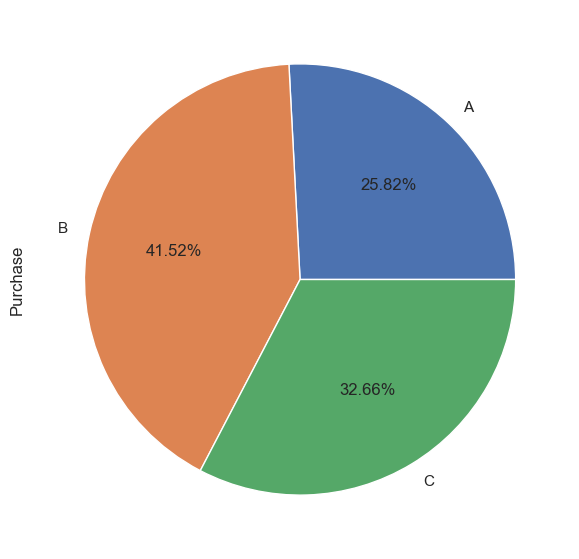

In [34]:
df.groupby('City_Category')['Purchase'].sum().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='Purchase'>

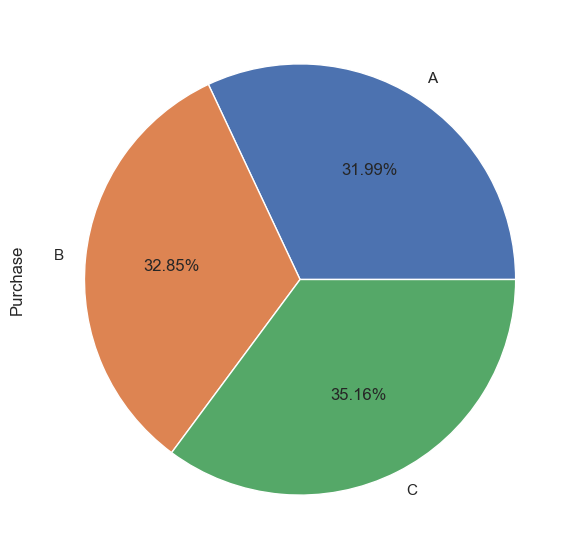

In [35]:
df.groupby('City_Category')['Purchase'].mean().plot(kind='pie',autopct='%.2f%%')

#### Find the number of purchases based on Stay_In_Current_City_Years

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

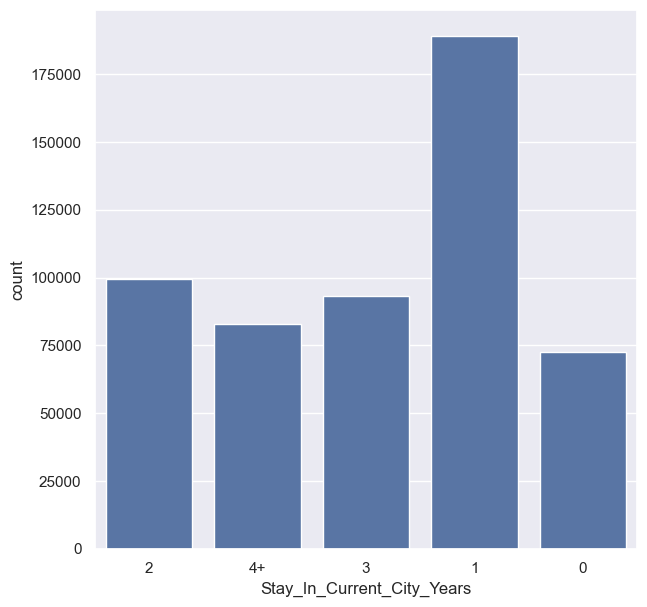

In [36]:
sns.countplot(data=df,x='Stay_In_Current_City_Years')

<Axes: xlabel='Occupation', ylabel='count'>

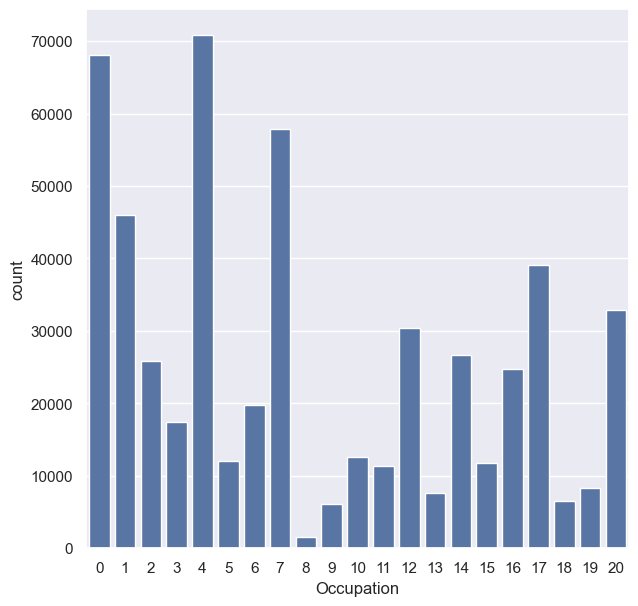

In [37]:
### From which occupation has maximum orders
sns.countplot(x=df['Occupation'])

<Axes: xlabel='Occupation'>

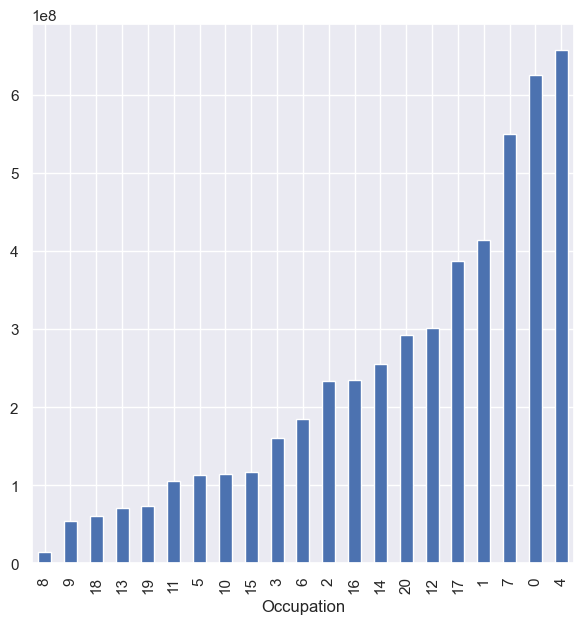

In [38]:
## How much money spend by people of a particular occupation
df.groupby('Occupation')['Purchase'].sum().sort_values().plot(kind='bar')

<Axes: xlabel='Occupation'>

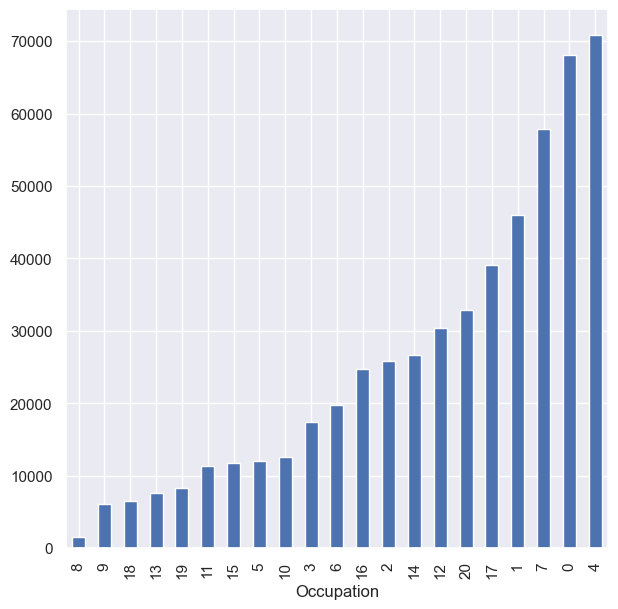

In [39]:
df.groupby('Occupation').size().sort_values().plot(kind='bar')

<Axes: xlabel='Occupation'>

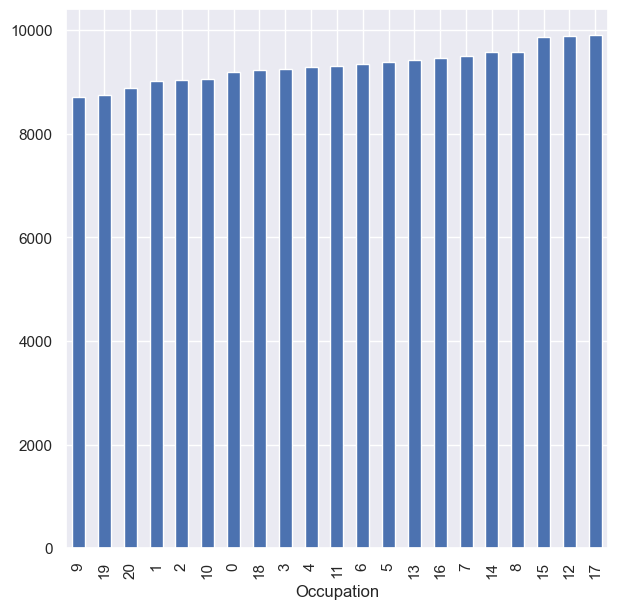

In [40]:
df.groupby('Occupation')['Purchase'].mean().sort_values().plot(kind='bar')

In [41]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [42]:
df[df['Product_ID']=='P00248942']

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
126,1000024,P00248942,F,26-35,7,A,3,1,1,15774
405,1000068,P00248942,M,18-25,4,A,0,0,1,11429
516,1000093,P00248942,M,26-35,17,B,1,1,1,11754
701,1000135,P00248942,M,18-25,4,C,1,1,1,19146
...,...,...,...,...,...,...,...,...,...,...
535935,1004483,P00248942,F,26-35,6,B,4+,0,1,19183
535957,1004488,P00248942,M,36-45,7,B,1,0,1,11941
536398,1004543,P00248942,M,26-35,2,A,0,0,1,15791
536492,1004567,P00248942,M,18-25,4,A,0,0,1,19132


In [43]:
df.groupby('Occupation')['Product_ID'].nunique()

Occupation
0     3243
1     3020
2     2892
3     2657
4     3174
5     2344
6     2724
7     3070
8     1026
9     1820
10    2110
11    2235
12    2664
13    1946
14    2680
15    2168
16    2863
17    2831
18    2047
19    2303
20    3147
Name: Product_ID, dtype: int64

<Axes: xlabel='Occupation'>

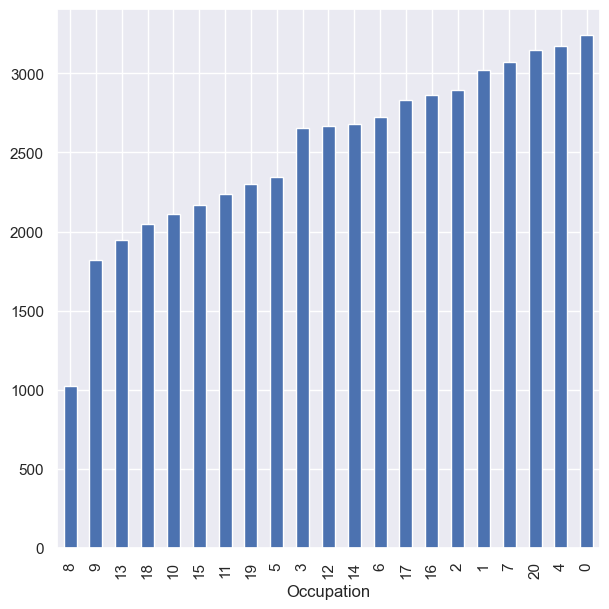

In [44]:
df.groupby('Occupation')['Product_ID'].nunique().sort_values().plot(kind='bar')

In [45]:
df.groupby('Product_Category_1').size()

Product_Category_1
1     138353
2      23499
3      19849
4      11567
5     148592
6      20164
7       3668
8     112132
9        404
10      5032
11     23960
12      3875
13      5440
14      1500
15      6203
16      9697
17       567
18      3075
dtype: int64

<Axes: xlabel='Product_Category_1'>

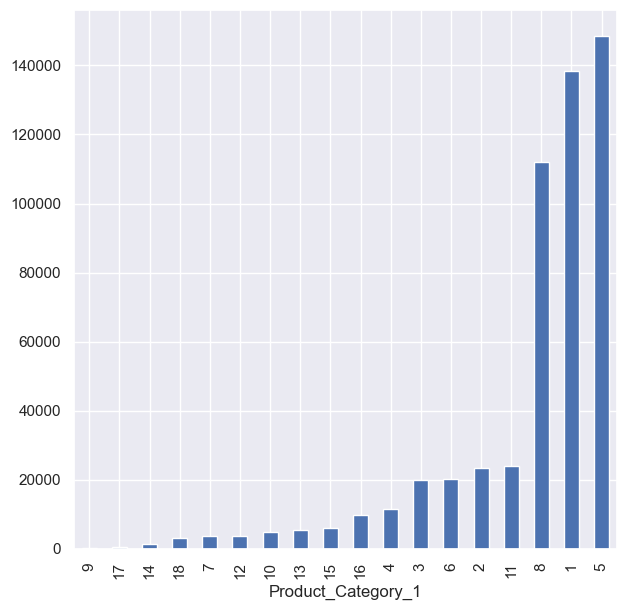

In [46]:
df.groupby('Product_Category_1').size().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

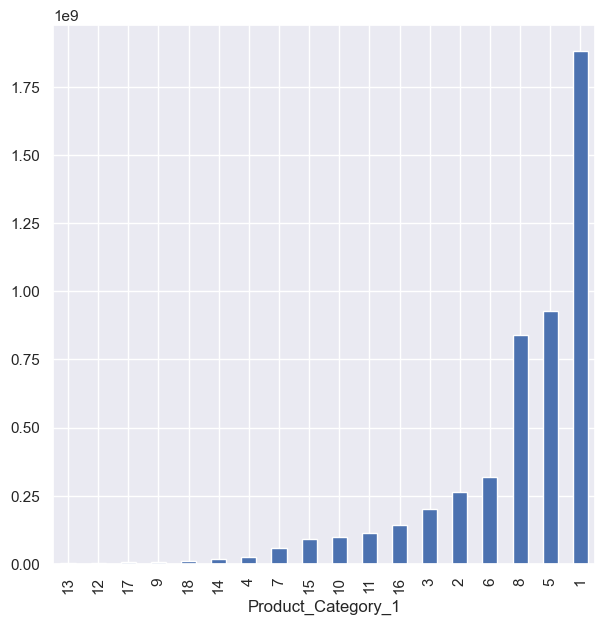

In [47]:
df.groupby('Product_Category_1')['Purchase'].sum().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

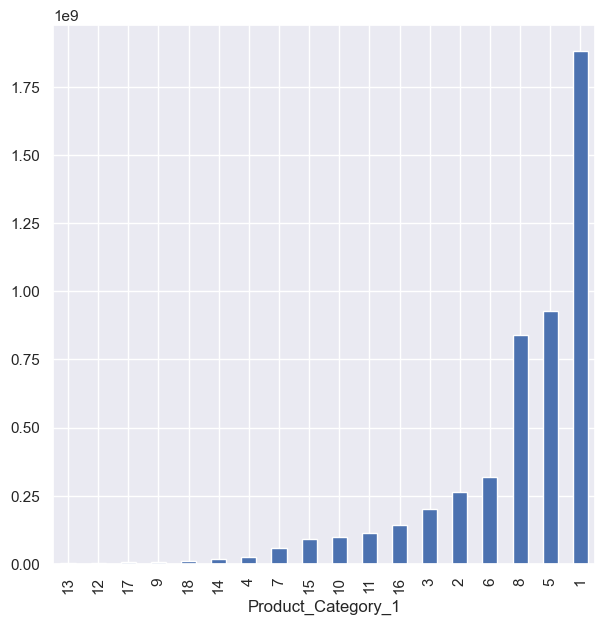

In [48]:
df.groupby('Product_Category_1')['Purchase'].sum().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

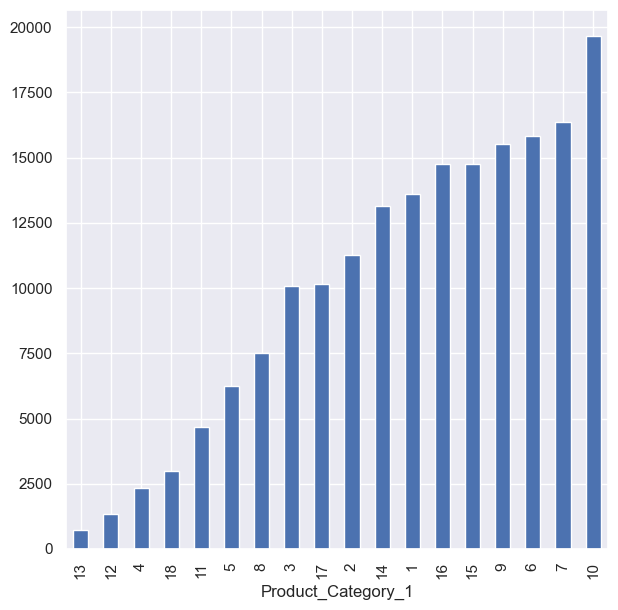

In [49]:
df.groupby('Product_Category_1')['Purchase'].mean().sort_values().plot(kind='bar')

- most money spend in products
- most times a product called
- expensive price

Text(0.5, 1.0, '10 Most called product')

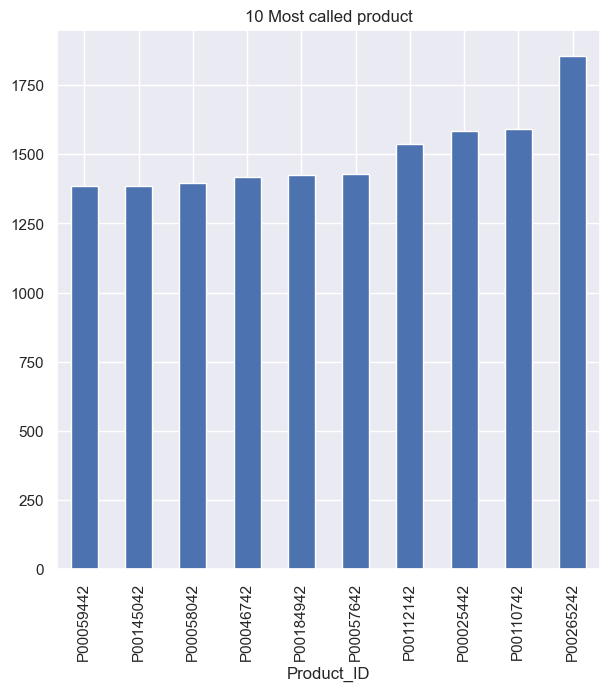

In [50]:
# most times a product called
df.groupby('Product_ID').size().nlargest(10).sort_values().plot(kind='bar')
plt.title('10 Most called product')

Text(0.5, 1.0, '10 Most money spended product')

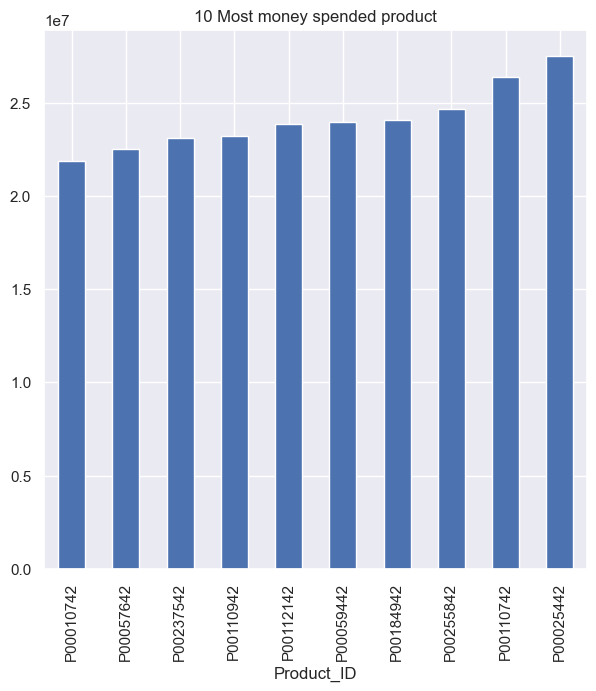

In [51]:
df.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values().plot(kind='bar')
plt.title('10 Most money spended product')

Text(0.5, 1.0, '10 Most expensive product')

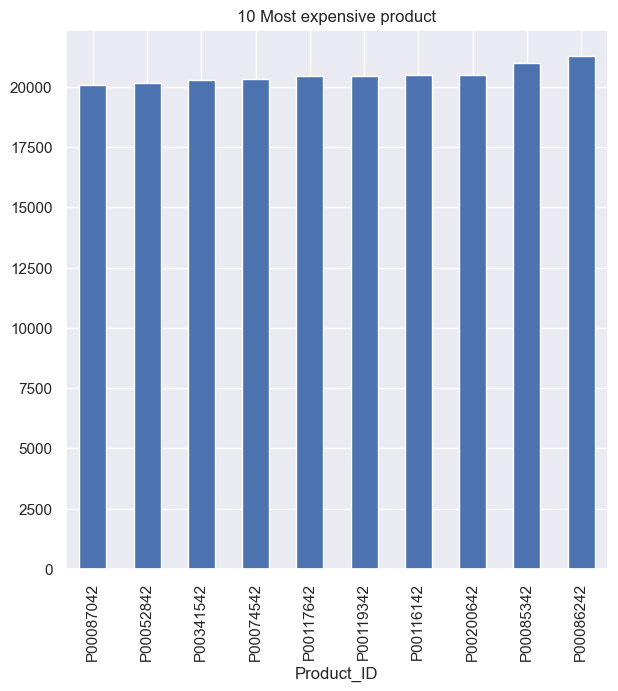

In [52]:
df.groupby('Product_ID')['Purchase'].mean().nlargest(10).sort_values().plot(kind='bar')
plt.title('10 Most expensive product')

In [53]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [54]:
df.groupby('Product_ID')['Purchase'].mean().sort_values(ascending=False)

Product_ID
P00086242    21297.865672
P00085342    20993.804428
P00200642    20479.229885
P00116142    20478.264753
P00119342    20454.296053
                 ...     
P00273842      524.666667
P00063242      498.000000
P00293442      478.500000
P00041442      455.540816
P00091742      405.000000
Name: Purchase, Length: 3623, dtype: float64

In [55]:
df.groupby(['Gender','Marital_Status'])['Purchase'].sum()

Gender  Marital_Status
F       0                  673815717
        1                  490808304
M       0                 2292473783
        1                 1560570574
Name: Purchase, dtype: int64

<Axes: xlabel='Gender,Marital_Status'>

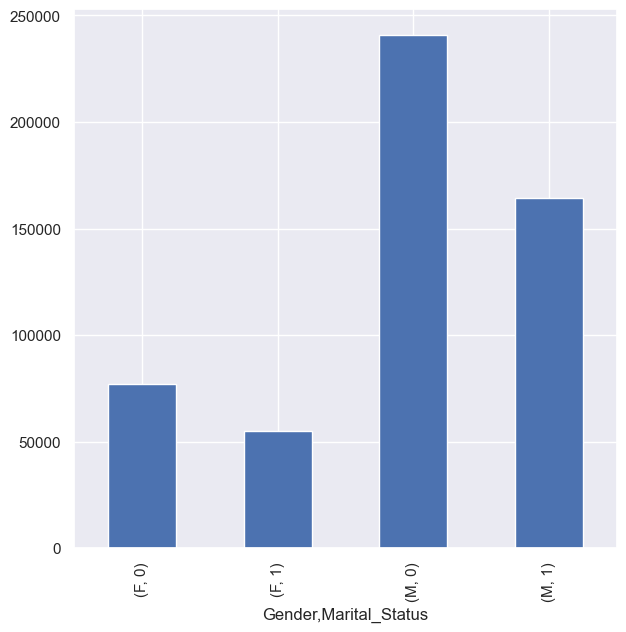

In [56]:
df.groupby(['Gender','Marital_Status']).size().plot(kind='bar')

<Axes: xlabel='Gender_Marital_Status', ylabel='count'>

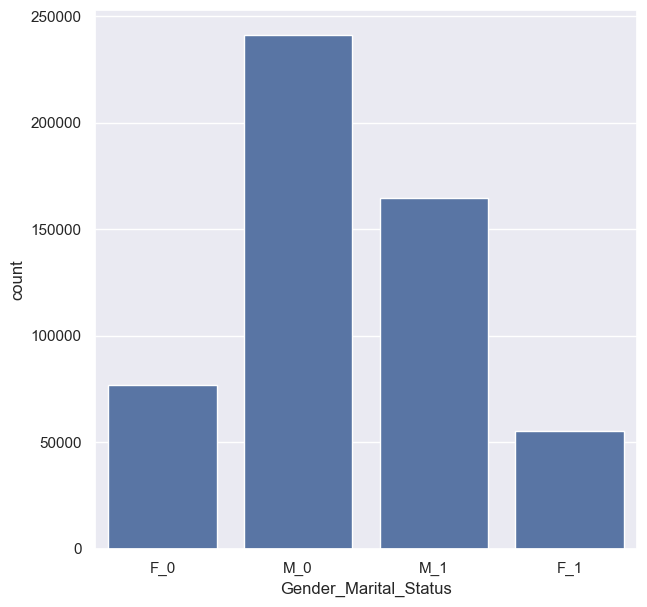

In [57]:
list_of_gender_marital_status=[]

for i in range(len(df)):
    list_of_gender_marital_status.append(df['Gender'][i]+'_'+str(df['Marital_Status'][i]))

df['Gender_Marital_Status']=list_of_gender_marital_status
sns.countplot(data=df,x='Gender_Marital_Status')

<Axes: xlabel='Age', ylabel='count'>

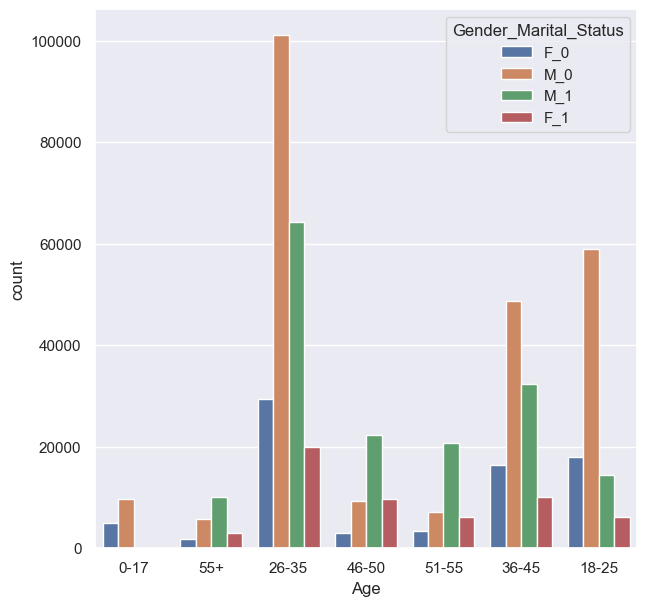

In [58]:
sns.countplot(data=df,x='Age',hue='Gender_Marital_Status')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

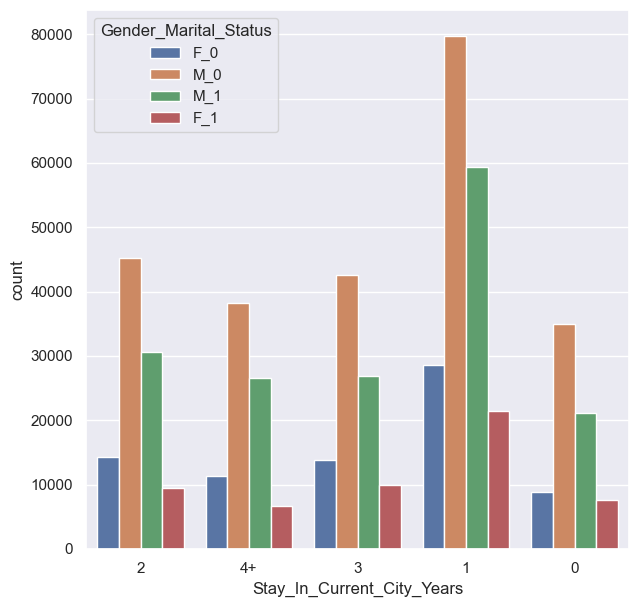

In [59]:
sns.countplot(data=df,x='Stay_In_Current_City_Years',hue='Gender_Marital_Status')

- Dataset Walkthrough

- Analyzing Columns

- Analyzing Gender

- Analysing Age & Marital Status

- Multi Column Analysis

- Occupation and Products Analysis

- Combining Gender & Marital Status

 

#### Dataset Walkthrough:

Here we are basically trying to check out the basic things regarding our dataset such as the column names, the data type of the columns, if there are any null values present in our data, etc. After some analysis we were able to detect a lot of null values in the column Product_Category_2 and Product_Category_3. So now if we try to use the function df.dopna() it would remove all the rows and might create a data loss problem later. Therefore we decide to delete the whole column instead and we get rid of all the null values present in our dataset.

 

#### Analyzing Columns:

In this section we have mainly used the unique() and nunique() functions to know the number of unique values present in every individual columns. For example when we have used the nunique() function with the columns User_ID and Product_ID we are able to get the actual total number of customers and total number of products present in our dataset. Similarly we have used the unique() function with the columns Gender and Age to get the different unique values present in those columns. Hence analyzing these individual columns like this tells us about the different kind of unique values present in our dataset.

 

### Analyzing Gender

In this section we are going to specifically analyze the Gender Column. So in the gender column we basically have Male and Female values. After doing some basic analysis we have noticed that the Male data is much more than the Female data in our dataset. We have even used the groupby function to see which Gender is purchasing more in our dataset. With the help of pie chart and bar plot we have presented them in a very nice manner.

 

### Analysing Age & Marital Status

In this section we are going to analyze the age and Martial Status columns. So we can again use the groupby function to see which age group is making the maximum number of order in our dataset. We can also see which age group has the highest purchasing amount in our dataset and can plot all the inferences with the help of pie chart and bar plots. After doing some basic analysis on Marital Status we can see that 60% of the people in our dataset is unmarried and 40% of them are married. We have even displayed them in pie chart forms for better understanding.

 

### Multi Column Analysis

So all this time we were just talking about single column analysis but now let's get started with multi column analysis. We will use the Seaborn library to visualise them and present them in a more beautiful manner. We have done analysis with the help of Age and Gender columns and presented them with the help of the Seaborn library. We have also added legends which is basically the hue parameter within the seaborn function. So we can basically do analysis for any number of columns based on our choice with the help of the seaborn library. 

 

### Occupation and Products Analysis

We are going to perform the same data visualizations which we did till now for the Occupation ,Product_ID and Product_Category_1 columns. Using the countplot we can get various insights about which kind of data is present the most in our dataset. We have also plotted normal bar plots with the help of groupby function to get information such as which Product_ID has got the maximum purchasing amount in our dataset.

 

### Combining Gender & Marital Status

So this the last subtopic in this project and here we have combined the Gender and Martial Status. Hence using seaborn we are able to perform various kinds of data visualizations and get meaningful insights of our data when Gender and Martial Status is combined with the help of mainly the countplot.